# 4. train test split in scikit learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Ingestion

In [2]:
day=pd.read_csv("day.csv")
hour=pd.read_csv("hour.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


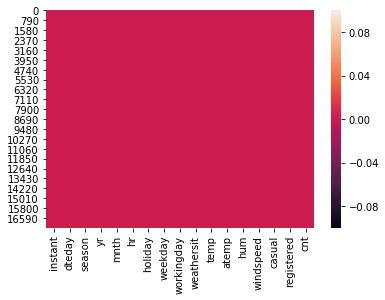

In [11]:
sns.heatmap(hour.isnull())
plt.show()

In [12]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- There is no null value in both the datasets. 
- Every feature is either integer or float except dteday. 
- Our target variable is the count of total rental bikes including both casual and registered18. 

### 2. Split Dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
hour.drop(['instant','dteday'],axis=1,inplace=True)
# dteday is of no use as there are different columns for year month, so ropping it.
#instant is workig like an id, so droppingit , its of no use. 

In [15]:
X=hour.drop(["cnt"],axis=1)
y=hour.cnt

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=7, test_size=.7)

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print("Training Score:",lr.score(xtrain,ytrain))
print("Testing Score:",lr.score(xtest,ytest))
from sklearn.metrics import r2_score
print("R Square Value:",r2_score(ytest,pred))

Training Score: 1.0
Testing Score: 1.0
R Square Value: 1.0


- Training and testing accuracy is same and its 1
- that means model is getting trained well and is predicted the values exactly the same as actual values
- R2 is 1 that mean SSE is zero
- hence, Actual values are equal to predicted values

- model is neiher underfit nor overfit it is perfect balance of bias variance tradeoff